In [123]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 



#import seaborn as sns

In [124]:
mydf = pd.read_csv("D:\Programming\Task4.3\weatherHistory.csv")
mydf = mydf.drop(columns=["Formatted Date", "Daily Summary"  , "Precip Type" , "Summary" , "Loud Cover" ])
mydf #Our data is cleaned and ready to use


<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24728\3803900592.py:1: SyntaxWarning: invalid escape sequence '\P'
  mydf = pd.read_csv("D:\Programming\Task4.3\weatherHistory.csv")


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...
96448,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = mydf[['Apparent Temperature (C)', 'Humidity' , "Wind Speed (km/h)" , "Wind Bearing (degrees)" , "Visibility (km)" , "Pressure (millibars)"]]
Y = mydf['Temperature (C)']
X_train , X_Test , Y_train , Y_test = train_test_split(X , Y , test_size=0.7 , random_state=0 )
regr = LinearRegression()
regr.fit(X_train,Y_train)


LinearRegression()

X = The inDependent  Variable (Humidty , Visibility , WindSpeed , WindBearing , Pressure  )
Y= The Dependent Variable (Temp)
e2 = The sum of (ActY - PredictedY)2 , And the least e is the best regression line

In [126]:
#Prediction Variables

y_predict = regr.predict(X_Test)
y_predict


array([14.21418671, 13.44514802, 23.34267986, ..., 22.45753478,
        1.07967323, 16.55068999])

In [131]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae= mean_absolute_error(Y_test, y_predict)
mse = mean_squared_error(Y_test, y_predict)
r2 = r2_score(Y_test, y_predict)
print (mae)
print (mse)
print(r2)               

0.7418160401279063
0.8965538545562648
0.990184645804225


In [128]:

#Fn takes the inputs and predict the possible Temp

predictedTemp = regr.predict([[5.944444,0.83 , 14.1036 , 269.0, 15.8263 , 1016.41 ]]) #I will try to predict the Temp from column 3 -----> the true value is 8.288889 
print(predictedTemp)

[7.78996221]


d:\Programming\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


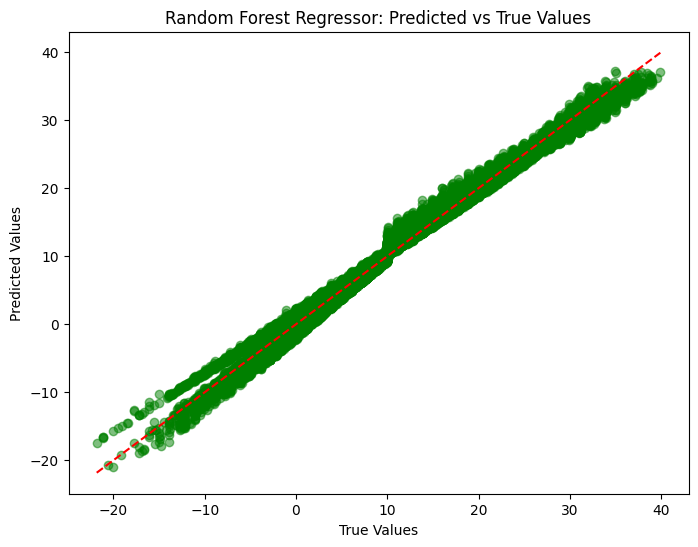

In [129]:
# Plot for Random Forest Regressor
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_predict , color='green', alpha=0.5)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')  # Line for perfect prediction
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor: Predicted vs True Values')
plt.show()


1. What type of machine learning problem is this?

It is a suprvised machine learning with the linear regression method

2. How do the features relate to each other and to the
weather conditions?

The apparent temperature is almost the same as the real temperature ,,,
The humidty is the most Segment affects the Temp ,,, 
The wind speed has kind of a relation with humidty

3. What are the steps involved in preprocessing the dataset for machine learning?

1- Cleaning the data set (Already was cleaned)
2-Defining our X and Y (dependent Variable and non dependent variables)
3-Defining the train and test variables and choosing a train percent of our total data (in this case it is 70% )
4-Calculateing the R2 which shows how good the model works (in our case it was 0.990184645804225)
5-try our model py passing some X variables from the dataset and see what will be it's Y prediction (in our case he predicted the Temp to be 7.78996221 while it was 8.288889  )



4. How do we select the best model for our dataset? Hint use different regression models and compare their metrics

I used the MAE and MSE and R2 , and the result showed that R2 is the best fit

5. What metrics should we use to evaluate the performance of our weather prediction model?

The R2

6. Plot the predicted vs true values